<div align="center">

# Extreme temperature indices from CORDEX Regional Climate Models

<br>
</div>



<div align="center">
    
## Use case 1 : Defining a strategy to optimise reinsurance protections   
#### - How well do CORDEX projections represent trends and variability in air temperature extremes in Europe?
#### - What are the associated uncertainties in future projections?

<br>


## General abstract
In this notebook, data from a subset of 9 models of  **[CORDEX](https://confluence.ecmwf.int/display/CKB/CORDEX%3A+Regional+climate+projections)** Regional Climate Models (RCM), as well as **[ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-complete?tab=doc)** reanalysis, are considered. Two maximum-temperature-based **[ECA&D](https://www.ecad.eu/indicesextremes/)** indices (one of physical nature and the other of statistical nature) are calculated using the **[icclim](https://icclim.readthedocs.io/en/stable/)** Python package. The first index, labeled with the **[ETCCDI](https://etccdi.pacificclimate.org)** short name **'SU'**, represents the count of summer days (i.e., with daily maximum temperature above 25°C) occurring in a year or a season (JJA in the example presented here). The second index, labeled with the ETCCDI short name **'TX90p'**, describes the number of days with daily maximum temperatures exceeding the daily 90th percentile of maximum temperature for a 5-day moving window. This notebook is subdivided into two sections, hereafter referred to as sub-notebooks, each focusing on a different assessment necessary to address the user's questions properly.

## Sub-notebooks

Here we present the two sub-notebooks necessary to address the user's questions properly. You can refer to any of them to view the sub-notebook output: 

* [1. HISTORICAL PERIOD NOTEBOOK](#1.-HISTORICAL-PERIOD-NOTEBOOK)
* [2. FUTURE PERIOD NOTEBOOK](#2.-FUTURE-PERIOD-NOTEBOOK)


<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>IMPORTANT</b>:<br> 
These sub-notebooks were designed to be run individually since they handle a large amount of data and utilize different approaches and methods. They are grouped together because the results of all two complement each other and provide an overview that can collectively address the user's questions. Running the entire notebook at once may lead to heavy processing. Therefore, please consider focusing on just one of the two sub-notebooks presented here.

<br>
<br>
<div align="center">
    
# 1. HISTORICAL PERIOD NOTEBOOK 

## Outline of the sub-notebook 1  

*  [1.1. Abstract](#1.1.-Abstract)
*  [1.2. Methods and analyses](#1.2.-Methods-and-analyses)
*  [1.3. Take home messages](#section1_3)
*  [1.4. Parameters, requests and functions definition](#1.4.-Parameters,-requests-and-functions-definition)
     *  [1.4.1. Import packages](#1.4.1.-Import-packages)
     *  [1.4.2. Define Parameters](#1.4.2.-Define-Parameters)
     *  [1.4.3. Define models](#1.4.3.-Define-models)
     *  [1.4.4. Define ERA5 request](#1.4.4.-Define-ERA5-request)
     *  [1.4.5. Define model requests](#1.4.5.-Define-model-requests)
     *  [1.4.6. Functions to cache](#1.4.6.-Functions-to-cache)
*  [1.5. Downloading and processing](#1.5.-Downloading-and-processing)
     *  [1.5.1. Download and transform ERA5](#1.5.1.-Download-and-transform-ERA5)
     *  [1.5.2. Download and transform models](#1.5.2.-Download-and-transform-models)
     *  [1.5.3. Apply land-sea mask and change attributes](#1.5.3.-Apply-land-sea-mask-and-change-attributes)
*  [1.6. Plotting section](#1.6.-Plotting-section)
     *  [1.6.1. Define plotting function](#1.6.1.-Define-plotting-function)
     *  [1.6.2. Plot ensemble maps](#1.6.2.-Plot-ensemble-maps)
     *  [1.6.3. Plot model maps](#1.6.3.-Plot-model-maps)
     *  [1.6.4 Plot bias maps](#1.6.4-Plot-bias-maps)
     *  [1.6.5. Boxplots of the historical trend and the trend bias](#1.6.5.-Boxplots-of-the-historical-trend-and-the-trend-bias)

## 1.1. Abstract 

In this sub-notebook, data from a subset of 9 models of  **[CORDEX](https://confluence.ecmwf.int/display/CKB/CORDEX%3A+Regional+climate+projections)** Regional Climate Models (RCM), as well as **[ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-complete?tab=doc)** reanalysis, are considered Two maximum-temperature-based **[ECA&D](https://www.ecad.eu/indicesextremes/)** indices (one of physical nature and the other of statistical nature) are calculated using the **[icclim](https://icclim.readthedocs.io/en/stable/)** Python package. The first index, labeled with the **[ETCCDI](https://etccdi.pacificclimate.org)** short name **'SU'**, represents the count of summer days (i.e., with daily maximum temperature above 25°C) occurring in a year or a season (JJA in the example presented here). The second index, labeled with the ETCCDI short name **'TX90p'**, describes the number of days with daily maximum temperatures exceeding the daily 90th percentile of maximum temperature for a 5-day moving window. These calculations are performed over the historical period from **1971 to 2000**.

After calculating these indices for the historical period (resulting in index values per year), temporal means and trends are calculated. Following this, the bias of the temporal mean values and the trend bias are calculated, using ERA5 as the reference dataset. These biases are displayed for each model and for the ensemble median. Additionally, maps of the ensemble spread (derived as the standard deviation of the ensemble members' distribution) are calculated and displayed for the mean values and for the trends. Finally, boxplots which represent statistical distributions (PDF) built on the historical trend from each considered model are shown (also in this case ERA 5 is considered as reference product). 

The size and location of the subdomain considered are customizable, as well as the temporal aggregation (annual or seasonal).

## 1.2. Methods and analyses

This sub-notebook performs the following analyses:

- Maps representing the spatial distribution of the **historical mean values** (1971-2000) of the indices 'SU' and 'TX90p' for ERA5, each model individually, the ensemble median, and the ensemble spread.
- Maps representing the spatial distribution of the **historical trends** (1971-2000) of the indices 'SU' and 'TX90p'. Similar to the first analysis, this includes ERA5, each model individually, the ensemble median, and the ensemble spread.
- **Bias maps of the historical mean values**.
- **Trend bias maps**. 
- **Boxplots** which represent statistical distributions (PDF) built on the historical trend from each considered model. Also in this case ERA 5 is considered as reference product.
- **Boxplots of the trend bias** which illustrates the spatially-averaged trend bias for each model.

<a id='section1_3'></a>

## 1.3. Take home messages

- Across the examined region, Regional Climate Models (RCMs) consistently tend to underestimate trends compared to ERA5. Specifically, for the 'SU' index, the CORDEX ensemble median, as derived from boxplots, displays a trend of approximately 0.5 days per decade, contrasting with ERA5's ~2 days per decade. Similarly, the 'TX90p' index reveals around 0.6 days per decade for the CORDEX ensemble median compared to the ~2 days per decade observed in ERA5. This outcome aligns with findings from the CMIP6 Global Climate Models (GCMs) ensemble. The interquartile range spans from approximately 0.25 to 0.75 for the 'SU' index and from 0.5 to 0.75 for the 'TX90p' index. The interquartile range of the ensemble for the trend bias spans from approximately -1.7 to -1.1 days per decade for the 'SU' index and from -1.4 to -1 days per decade for the 'TX90p' index, indicating that, in general, trend biases for these CORDEX models are higher than for the selected CMIP6 models.

- While RCMs have demonstrated capability in enhancing GCMs' mean values for the considered indices, their efficacy in replicating historical trends appears limited. Analyzing the spatial patterns of trend bias, the ensemble median of the CORDEX models results closely resemble those obtained in the CMIP6 exercise. Notably, the most significant underestimation of trends is evident in the Mediterranean basin.

- In contrast to climatological assessments, the consistency in trend bias patterns across diverse RCMs suggests a potential dependence on the driving GCM, shared among all RCMs. However, a more extensive GCM-RCM matrix is imperative to accurately quantify this dependency and delineate the partitioning of uncertainty between GCMs and RCMs.

## 1.4. Parameters, requests and functions definition

### 1.4.1. Import packages

In [1]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

### 1.4.2. Define Parameters

In the "Define Parameters" section, various customizable options for the sub-notebook are specified:

- The initial and ending year used for the historical period can be specified by changing the parameters `year_start` and `year_stop` (1971-2000 is chosen for consistency between CORDEX and CMIP6).
- The `timeseries` set the temporal aggregation. For instance, selecting "JJA" implies considering only the JJA season.
- The `index_names` parameter enables the selection of maximum-temperature-based indices ('SU' and 'TX90p' in our case) from the [icclim](https://icclim.readthedocs.io/en/stable/) Python package.
- `collection_id` provides the choice between Global Climate Models CMIP6 or Regional Climate Models CORDEX.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.

In [2]:
# Time period
year_start = 1971
year_stop = 2000

# Choose annual or seasonal timeseries
timeseries = "JJA"
assert timeseries in ("annual", "DJF", "MAM", "JJA", "SON")

# Choose CORDEX or CMIP6
collection_id = "CORDEX"
assert collection_id in ("CORDEX", "CMIP6")

# Define region for analysis
area = [72, -22, 27, 45]

# Define region for request
cordex_domain = "europe"

# Define index names
index_names = ("SU", "TX90p")

# Interpolation method
interpolation_method = "bilinear"

# Chunks for download
chunks = {"year": 1}

### 1.4.3. Define models

The following climate analyses are performed considering a subset of RCMs from CORDEX. Models names are listed in the parameters below.

When choosing Cordex models, it is crucial to consider the availability of RCMs for the selected GCM and the specified region. The listed RCMs, for instance, are accessible for the GCM “mpi_m_mpi_esm_lr” in the “europe” cordex_domain. To confirm available combinations, refer to the Cordex webpage on Confluence.

In [3]:
models_cordex = [
    "clmcom_clm_cclm4_8_17",
    "clmcom_eth_cosmo_crclim",
    "cnrm_aladin63",
    "dmi_hirham5",
    "knmi_racmo22e",
    "mohc_hadrem3_ga7_05",
    "mpi_csc_remo2009",
    "smhi_rca4",
    "uhoh_wrf361h",
]

models_cmip6 = [
    "access_cm2",
    "awi_cm_1_1_mr",
    "cmcc_esm2",
    "cnrm_cm6_1_hr",
    "ec_earth3_cc",
    "gfdl_esm4",
    "inm_cm5_0",
    "miroc6",
    "mpi_esm1_2_lr",
]

### 1.4.4. Define ERA5 request

Within this sub-notebook, ERA5 serves as the reference product. In this section, we set the required parameters for the cds-api data-request of ERA5.

In [4]:
request_era = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": [f"{hour:02d}:00" for hour in range(24)],
        "variable": "2m_temperature",
        "year": [
            str(year)
            for year in range(year_start - int(timeseries == "DJF"), year_stop + 1)
        ],  # Include D(year-1)
        "month": [f"{month:02d}" for month in range(1, 13)],
        "day": [f"{day:02d}" for day in range(1, 32)],
        "area": area,
    },
)

request_lsm = (
    request_era[0],
    request_era[1]
    | {
        "year": "1940",
        "month": "01",
        "day": "01",
        "time": "00:00",
        "variable": "land_sea_mask",
    },
)

### 1.4.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

The `get_cordex_years` function is employed to choose suitable data chunks for CORDEX data requests. 

When `Weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes. In contrast, CORDEX RCMs, using rotated grids, inherently account for different cell surfaces based on latitude, eliminating the need for a latitude cosine multiplicative factor (`Weights = False`).

In [5]:
request_cordex = {
    "format": "zip",
    "domain": cordex_domain,
    "experiment": "historical",
    "horizontal_resolution": "0_11_degree_x_0_11_degree",
    "temporal_resolution": "daily_mean",
    "variable": "maximum_2m_temperature_in_the_last_24_hours",
    "gcm_model": "mpi_m_mpi_esm_lr",
    "ensemble_member": "r1i1p1",
    "area": area,
}

request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "experiment": "historical",
    "variable": "daily_maximum_near_surface_air_temperature",
    "year": [
        str(year) for year in range(year_start - 1, year_stop + 1)
    ],  # Include D(year-1)
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}


def get_cordex_years(
    year_start,
    year_stop,
    timeseries,
    start_years=list(range(1951, 2097, 5)),
    end_years=list(range(1955, 2101, 5)),
):
    start_year = []
    end_year = []
    years = set(range(year_start - int(timeseries == "DJF"), year_stop + 1))
    for start, end in zip(start_years, end_years):
        if years & set(range(start, end + 1)):
            start_year.append(start)
            end_year.append(end)
    return start_year, end_year


if collection_id == "CORDEX":
    models = models_cordex
    model_key = "rcm_model"
    request_sim = (
        "projections-cordex-domains-single-levels",
        [
            {
                **request_cordex,
                "start_year": start_year,
                "end_year": end_year,
            }
            for start_year, end_year in zip(
                *get_cordex_years(year_start, year_stop, timeseries)
            )
        ],
    )
elif collection_id == "CMIP6":
    models = models_cmip6
    model_key = "model"
    request_sim = (
        "projections-cmip6",
        download.split_request(request_cmip6, chunks=chunks),
    )
else:
    raise ValueError(f"{collection_id=}")

### 1.4.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter, which could be a specific season (e.g., "JJA") or "annual." It tailors the dataset according to the specified criteria, providing either annual or seasonal data as the outcome.

- The `compute_indices` function utilizes the icclim package to calculate the selected maximum-temperature-based indices.

- The `compute_trends` function employs the Mann-Kendall test for trend calculation.

- Finally, the `compute_indices_and_trends` function selects the temporal aggregation using the `select_timeseries` function. It then computes daily maximum temperature (only if we are dealing with ERA5), calculates maximum-temperature-based indices via the `compute_indices` function, determines the indices mean over the historical period (1971-2000), obtain the trends using the `compute_trends` function, and offers an option for regridding to ERA5 if required.

In [6]:
def select_timeseries(ds, timeseries, year_start, year_stop):
    if timeseries == "annual":
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    ds = ds.sel(time=slice(f"{year_start-1}-12", f"{year_stop}-11"))
    return ds.where(ds["time"].dt.season == timeseries, drop=True)


def compute_indices(ds, index_names, timeseries, tmpdir):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    datasets = [
        icclim.index(
            index_name=index_name,
            in_files=in_files,
            out_file=f"{tmpdir}/{index_name}.nc",
            slice_mode="year" if timeseries == "annual" else timeseries,
        )
        for index_name in index_names
    ]

    return xr.merge(datasets).drop_dims("bounds")


def compute_trends(ds):
    datasets = []
    (lat,) = set(ds.dims) & set(ds.cf.axes["Y"])
    (lon,) = set(ds.dims) & set(ds.cf.axes["X"])
    coords_name = {
        "time": "time",
        "y": lat,
        "x": lon,
    }
    for index, da in ds.data_vars.items():
        ds = Mann_Kendall_test(
            da - da.mean("time"),
            alpha=0.05,
            method="theilslopes",
            coords_name=coords_name,
        ).compute()
        ds = ds.rename({k: v for k, v in coords_name.items() if k in ds.dims})
        ds = ds.assign_coords({dim: da[dim] for dim in ds.dims})
        datasets.append(ds.expand_dims(index=[index]))
    ds = xr.concat(datasets, "index")
    return ds


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out


def compute_indices_and_trends(
    ds,
    index_names,
    timeseries,
    year_start,
    year_stop,
    resample,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds = select_timeseries(ds, timeseries, year_start, year_stop)
    if resample:
        ds = ds.resample(time="1D").max(keep_attrs=True)
    with tempfile.TemporaryDirectory() as tmpdir:
        ds_indices = compute_indices(ds, index_names, timeseries, tmpdir).compute()
        ds_trends = compute_trends(ds_indices)
        ds = ds_indices.mean("time", keep_attrs=True)
        ds = ds.merge(ds_trends)
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

## 1.5. Downloading and processing

### 1.5.1. Download and transform ERA5

In this section, the 'download.download_and_transform' function from the 'c3s_eqc_automatic_quality_control' package is employed to download ERA5 reference data, select the temporal aggregation ("JJA" in our example), compute daily maximum temperature from hourly data, compute the maximum-temperature-based indices, calculate the mean and trend for the historical period (1971-2000) and cache the result (to avoid redundant downloads and processing). To achieve this, the function requires the following arguments:

- `transform_func_kwargs`, which includes parameters defined earlier in the sub-notebook.
- `resample` set to `True`, allowing the calculation of the daily maximum temperature.
- `transform_func` set to `compute_indices_and_trends`. The `compute_indices_and_trends` function was defined earlier in the "Functions to cache" section and allows the computation of indices and the calculation of their mean and trend over the historical period (1971-2000).

In [7]:
transform_func_kwargs = {
    "index_names": sorted(index_names),
    "timeseries": timeseries,
    "year_start": year_start,
    "year_stop": year_stop,
}
ds_era5 = download.download_and_transform(
    *request_era,
    chunks=chunks,
    transform_chunks=False,
    transform_func=compute_indices_and_trends,
    transform_func_kwargs=transform_func_kwargs | {"resample": True},
)

### 1.5.2. Download and transform models

In this section, the 'download.download_and_transform' function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the CORDEX models, select the temporal aggregation ("JJA" in our example), compute the maximum-temperature-based indices, calculate the mean and trend for the historical period (1971-2000), interpolate to ERA5's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing). To achieve this, the function requires the following arguments:

- `transform_func_kwargs`, which includes parameters defined earlier in the sub-notebook.
- `resample` set to `False`, daily maximum temperatures are already used.
- `transform_func` set to `compute_indices_and_trends`. The `compute_indices_and_trends` function was defined earlier in the "Functions to cache" section and allows the computation of indices and the calculation of their mean and trend over the historical period (1971-2000).

In [8]:
interpolated_datasets = []
model_datasets = {}
for model in models:
    print(f"{model=}")
    model_kwargs = {
        "collection_id": request_sim[0],
        "requests": [request | {model_key: model} for request in request_sim[1]],
        "chunks": chunks if collection_id == "CMIP6" else None,
        "transform_chunks": False,
        "transform_func": compute_indices_and_trends,
    }
    # Original model
    model_datasets[model] = download.download_and_transform(
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs | {"resample": False},
    )

    # Interpolated model
    ds = download.download_and_transform(
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "resample": False,
            "request_grid_out": request_lsm,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model")

model='clmcom_clm_cclm4_8_17'
model='clmcom_eth_cosmo_crclim'
model='cnrm_aladin63'
model='dmi_hirham5'
model='knmi_racmo22e'
model='mohc_hadrem3_ga7_05'
model='mpi_csc_remo2009'
model='smhi_rca4'
model='uhoh_wrf361h'


### 1.5.3. Apply land-sea mask and change attributes

This section performs the following tasks:

1. Downloads the sea mask for ERA5.
2. Applies the sea mask to both ERA5 data and the model data, which were previously regridded to ERA5's grid (i.e., it applies the ERA5 sea mask to `ds_interpolated`).
3. Regrids the ERA5 land-sea mask to the model's grid and applies it to them.
4. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models (mean and trend over the historical period, p-value of the trends...) regridded to ERA5. `model_datasets` contain the same data but in the original grid of each model.

In [9]:
# Mask
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)
ds_era5 = ds_era5.where(lsm)
ds_interpolated = ds_interpolated.where(lsm)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_era5, ds_interpolated, *model_datasets.values()):
    ds["trend"] *= 10
    ds["trend"].attrs = {"long_name": "trend", "units": "days / decade"}
    for index in index_names:
        ds[index].attrs = {"long_name": "", "units": "days"}


## 1.6. Plotting section

### 1.6.1. Define plotting function

The functions presented here are used to plot the mean values and trends calculated over the historical period (1971-2000) for each of the indices ('SU' and 'TX90p').

For a selected index, three layout types can be displayed, depending on the chosen function:

1. Layout including the reference ERA5 product, the ensemble median, the bias of the ensemble median, and the ensemble spread: `plot_ensemble()` is used.
2. Layout including every model (for the trend and mean values): `plot_models()` is employed.
3. Layout including the bias of every model (for the trend and mean values): `plot_models()` is used again.

`trend==True` argument allows displaying trend values over the historical period, while `trend==False` will show mean values. When the `trend` argument is set to `True`, regions with no significance are hatched. For individual models and ERA5, a grid point is considered to have a statistically significant trend when the p-value is lower than 0.05 (in such cases, no hatching is shown). However, for determining trend significance for the ensemble median, reliance is placed on agreement categories, following the advanced approach proposed in AR6 [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Atlas.pdf) on pages 1945-1950. The `hatch_p_value_ensemble()` function is used to distinguish between three possible cases:

1. If more than 66% of the members are statistically significant (p-value < 0.05) and more than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, and there is agreement on the sign. To represent this, no hatching is used.
2. If less than 66% of the members are statistically significant, regardless of agreement on the sign of the trend, hatching is applied (indicating that the ensemble median trend is not statistically significant).
3. If more than 66% of the members are statistically significant but less than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, but there is no agreement on the sign of the trend. This is represented using crosses.

In [10]:
#Define function to plot the cation of the figures (for the ensmble case)
def add_caption_ensemble(trend,exp):
    #Add caption to the figure
    caption_text= f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend for the {exp} period ({year_start} - {year_stop}). The layout includes data corresponding to: (a) ERA5, (b) the ensemble median, (c) the bias of the ensemble median and (d) the ensemble spread (derived as the standard deviation of the ensemble members distribution)."  if trend else f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Mean for the {exp} period ({year_start} - {year_stop}). The layout includes data corresponding to: (a) ERA5, (b) the ensemble median, (c) the bias of the ensemble median and (d) the ensemble spread (derived as the standard deviation of the ensemble members distribution)." 
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the cation of the figures (for the individual models case)
def add_caption_models(trend,bias,exp):
    #Add caption to the figure
    if bias:             
        caption_text = f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend bias for the {exp} period ({year_start} - {year_stop}) of each individual {collection_id} model." if trend else f" Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Mean bias for the {exp} period ({year_start} - {year_stop}) of each individual {collection_id} model."
    else:
        caption_text = f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend for the {exp} period ({year_start} - {year_stop}) of each individual {collection_id} model." if trend else f" Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Mean for the {exp} period ({year_start} - {year_stop}) of each individual {collection_id} model."
    wrapped_lines = textwrap.wrap(caption_text, width=110)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)


def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=3,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **default_kwargs,
        )
        ax.set_title("Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **default_kwargs
    )
    ax.set_title("Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig



### 1.6.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualize the mean values and trends calculated over the historical period (1971-2000) for the model ensemble and ERA5 reference product across Europe.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents two layouts:

1. Only for the 'SU' index: mean values of the historical period (1971-2000) for: (a) the reference ERA5 product, (b) the ensemble median, (c) the bias of the ensemble median, and (d) the ensemble spread (derived as the standard deviation of the ensemble members' distribution).

2. Trend values of the historical period (1971-2000) for: (a) the reference ERA5 product, (b) the ensemble median, (c) the bias of the ensemble median, and (d) the ensemble spread (derived as the standard deviation of the ensemble members' distribution).

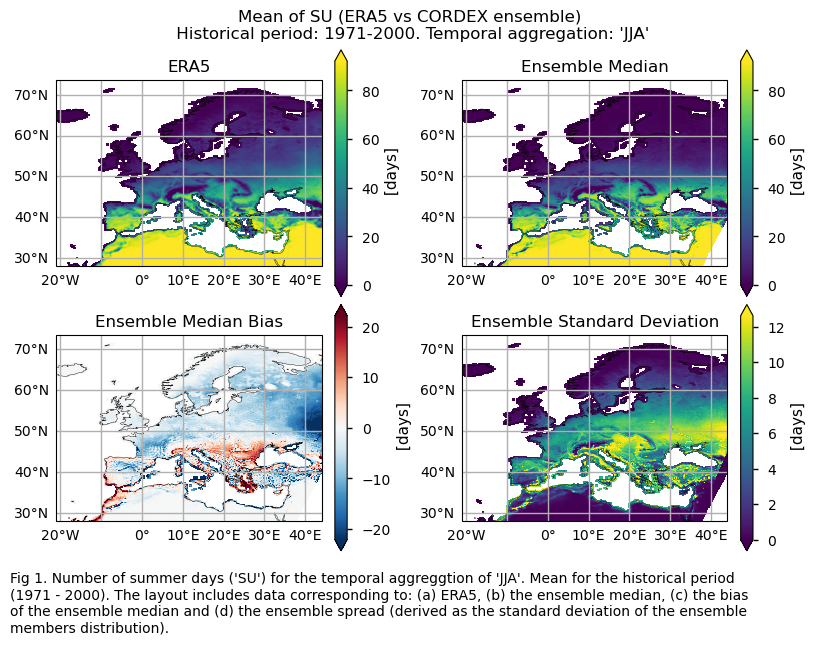

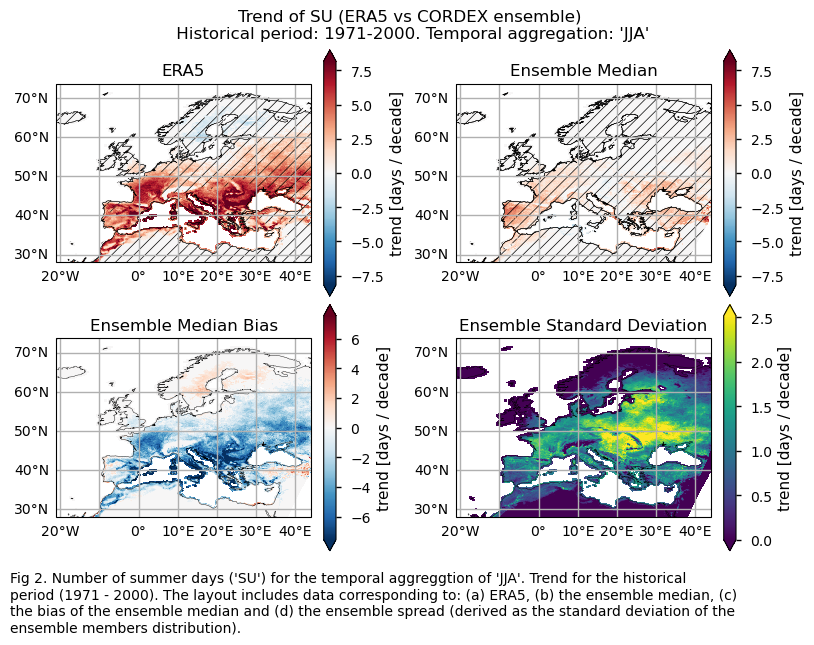

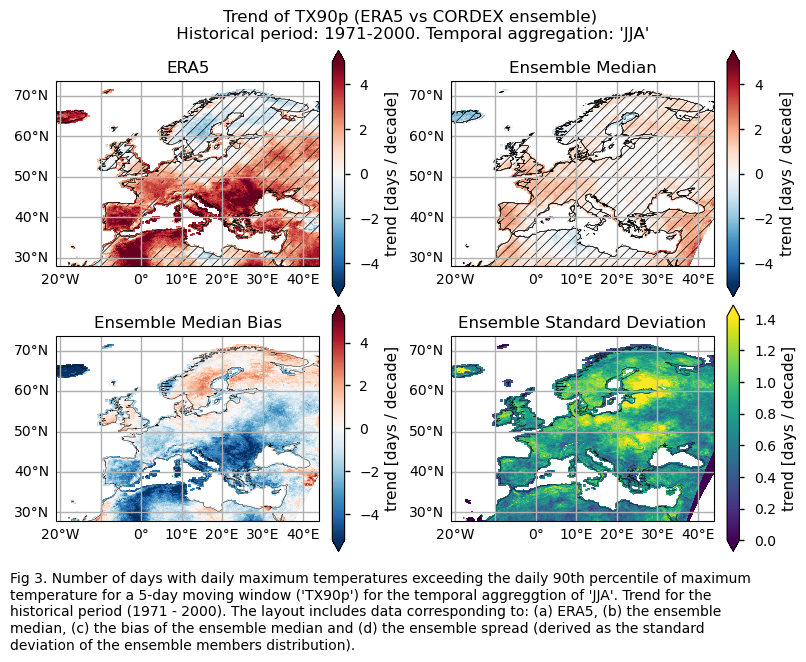

In [11]:
#Define dictionaries to use in titles and caption
long_name = {
    "SU":"Number of summer days",
    "TX90p":"Number of days with daily maximum temperatures exceeding the daily 90th percentile of maximum temperature for a 5-day moving window",
}
#Fig number counter
fig_number=1

#Common title
common_title = f"Historical period: {year_start}-{year_stop}. Temporal aggregation: '{timeseries}'"

for index in index_names:
    # Index
    if (index=="SU"):
        fig = plot_ensemble(da_models=ds_interpolated[index], da_era5=ds_era5[index])
        fig.suptitle(f"Mean of {index} (ERA5 vs {collection_id} ensemble)\n {common_title}")
        add_caption_ensemble(trend=False,exp="historical")
        plt.show()
        fig_number=fig_number+1
        print(f"\n")

    # Trend
    fig = plot_ensemble(
        da_models=ds_interpolated["trend"].sel(index=index),
        da_era5=ds_era5["trend"].sel(index=index),
        p_value_era5=ds_era5["p"].sel(index=index),
        p_value_models=ds_interpolated["p"].sel(index=index),
        center=0,
    )
    fig.suptitle(f"Trend of {index} (ERA5 vs {collection_id} ensemble)\n {common_title}")
    add_caption_ensemble(trend=True,exp="historical")
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

### 1.6.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualize the mean values and trends calculated over the historical period (1971-2000) for every model individually across Europe.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents two layouts:

1. A layout including the historical mean (1971-2000) of every model (only for the 'SU' index).

2. A layout including the historical trend (1971-2000) of every model.


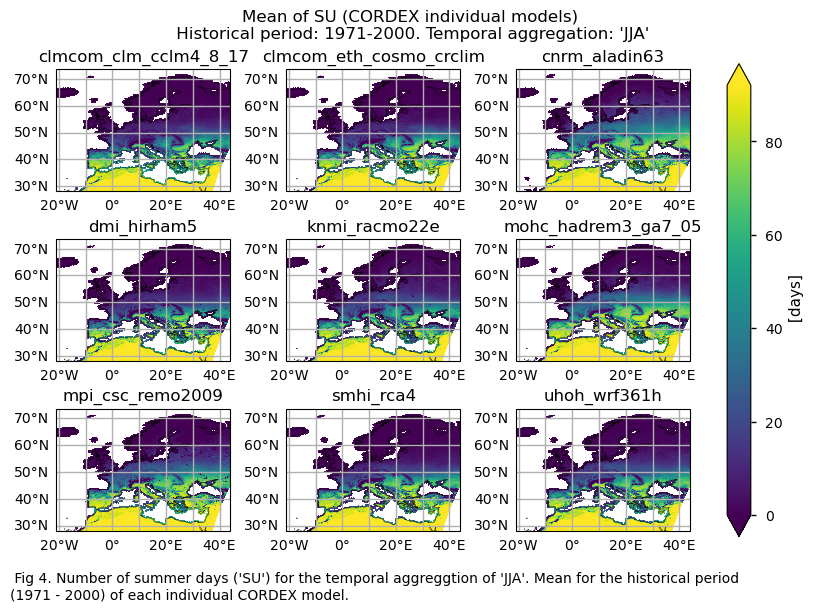

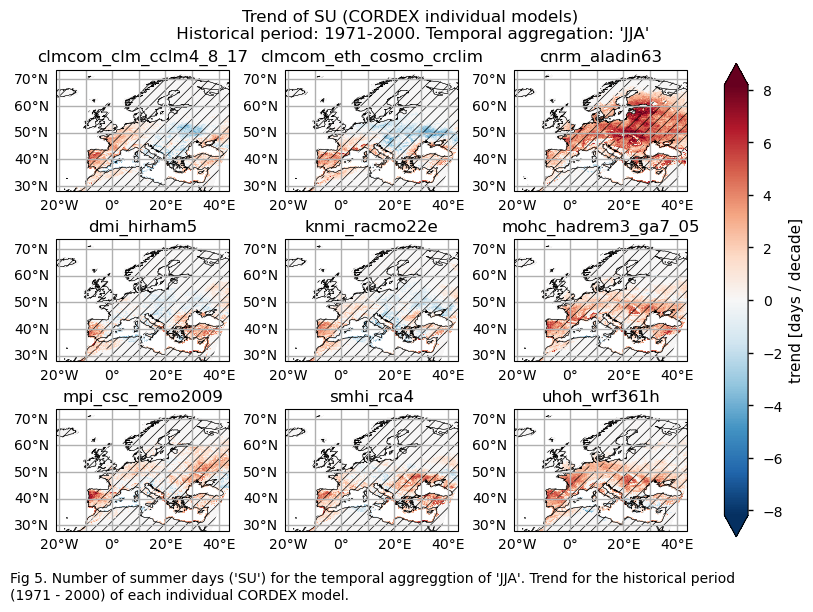

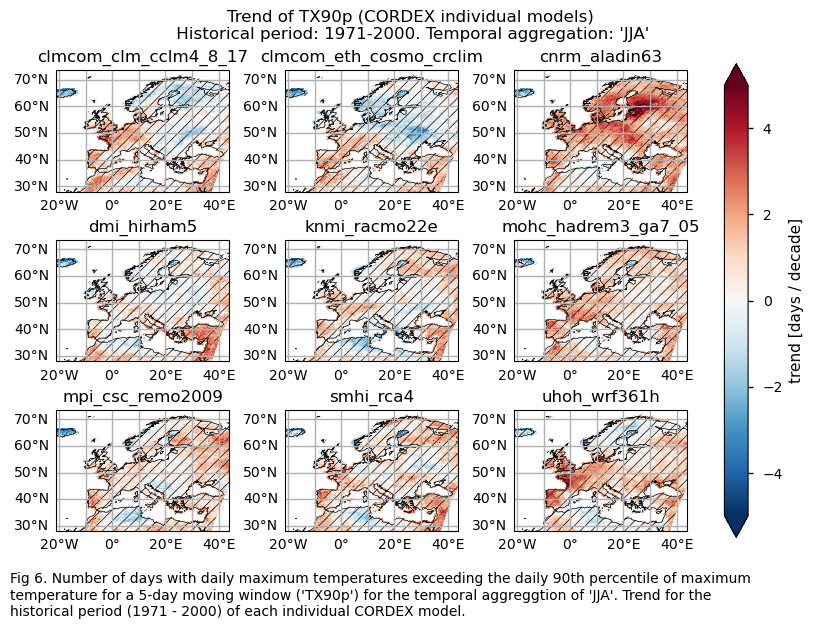

In [12]:
for index in index_names:
    # Index
    if (index=="SU"):
        fig = plot_models(
            data={model: ds[index] for model, ds in model_datasets.items()},
            da_for_kwargs=ds_era5[index],
        )
        fig.suptitle(f"Mean of {index} ({collection_id} individual models)\n {common_title}")
        add_caption_models(trend=False,bias=False,exp="historical")
        plt.show()
        print(f"\n")
        fig_number=fig_number+1

    # Trend
    fig = plot_models(
        data={
            model: ds["trend"].sel(index=index) for model, ds in model_datasets.items()
        },
        da_for_kwargs=ds_era5["trend"].sel(index=index),
        p_values={
            model: ds["p"].sel(index=index) for model, ds in model_datasets.items()
        },
        center=0,
    )
    fig.suptitle(f"Trend of {index} ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=True,bias=False,exp="historical")
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

### 1.6.4 Plot bias maps

In this section, we invoke the `plot_models()` function to visualize the bias for the mean values and trends calculated over the historical period (1971-2000) for every model individually across Europe.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents two layouts:

1. A layout including the bias for the historical mean (1971-2000) of every model (only for the 'SU' index).

2. A layout including the bias for the historical trend (1971-2000) of every model.


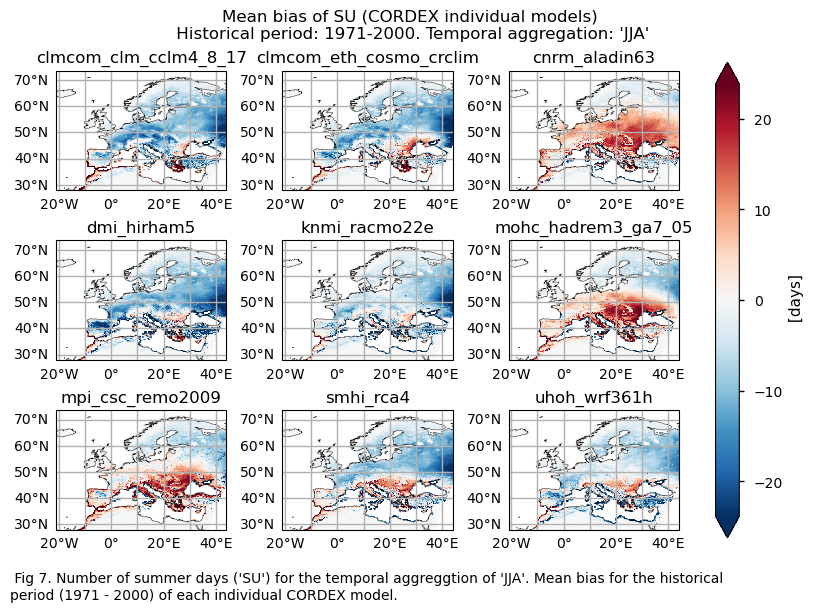

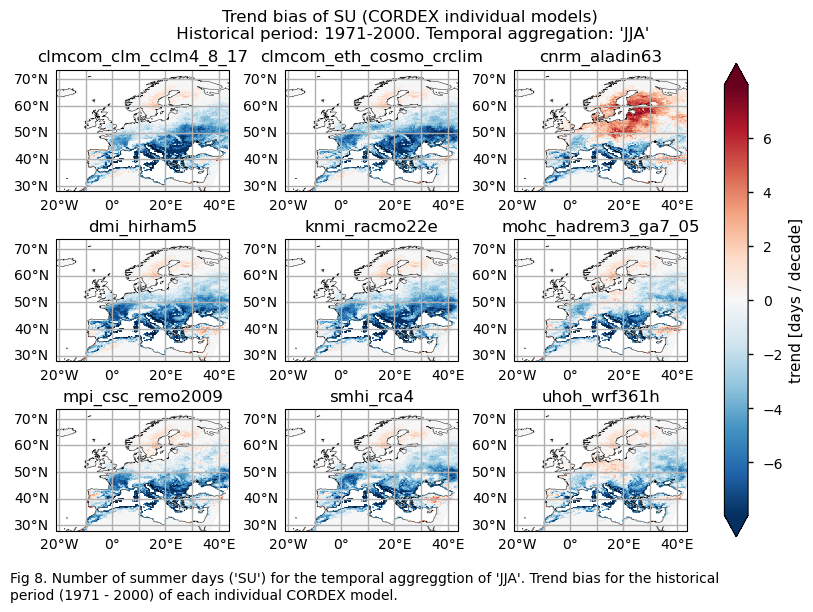

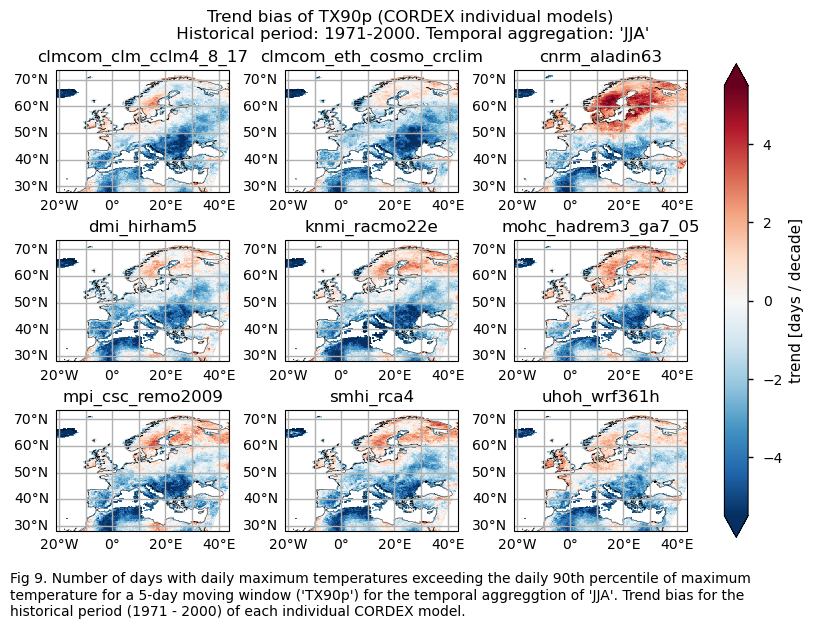

In [13]:
with xr.set_options(keep_attrs=True):
    bias = ds_interpolated - ds_era5

for index in index_names:
    # Index bias
    if (index=="SU"):
        fig = plot_models(data=bias[index], center=0)
        fig.suptitle(f"Mean bias of {index} ({collection_id} individual models)\n {common_title}")
        add_caption_models(trend=False,bias=True,exp="historical")
        plt.show()
        print(f"\n")
        fig_number=fig_number+1

    # Trend bias
    fig = plot_models(data=bias["trend"].sel(index=index), center=0)
    fig.suptitle(f"Trend bias of {index} ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=True,bias=True,exp="historical")
    plt.show()
    print(f"\n")
    fig_number=fig_number+1
    plt.show()

### 1.6.5. Boxplots of the historical trend and the trend bias

In this last section, we first compare the trends of the climate models with the reference trend from ERA5. Finally, we analyse the bias trend.  

Dots represent the spatially-averaged historical trend (or bias trend) over the selected region (change of the number of days per decade) for each model (grey), the ensemble mean (blue), and the reference product (orange). The ensemble median is shown as a green line.

The boxplot visually illustrates the distribution of trends (or bias trends) among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

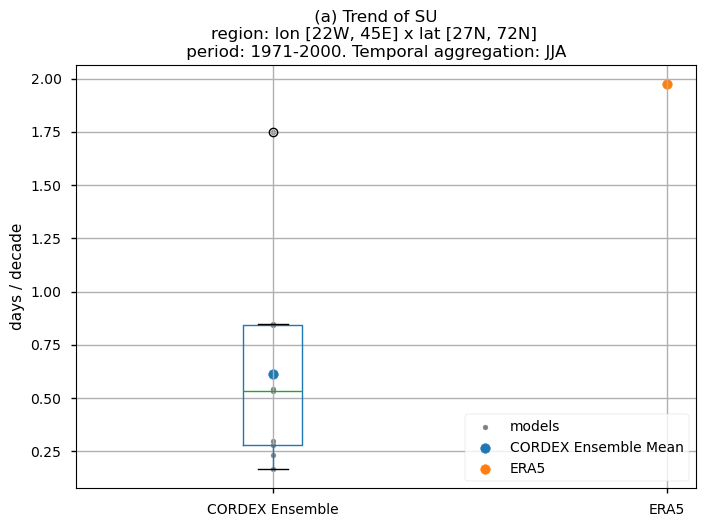

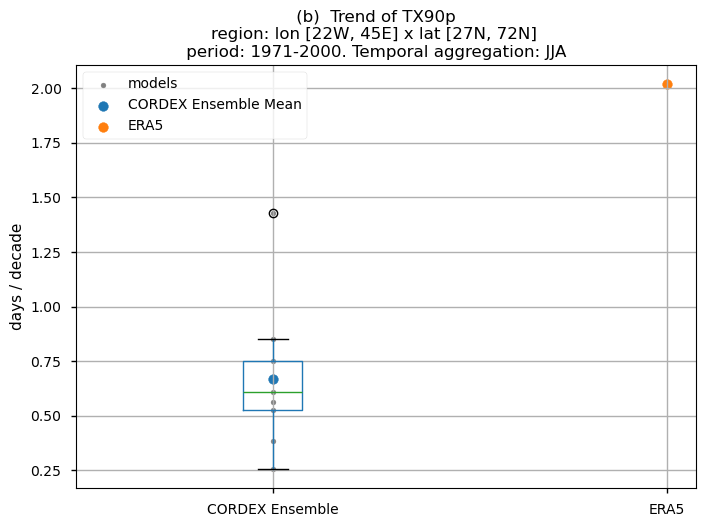

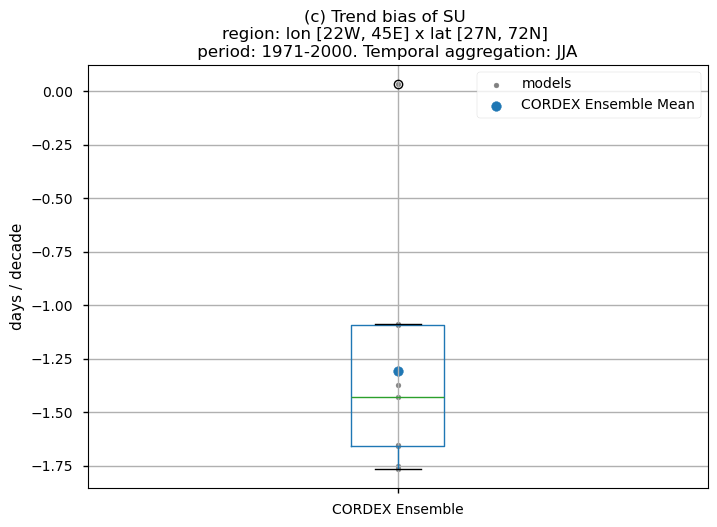

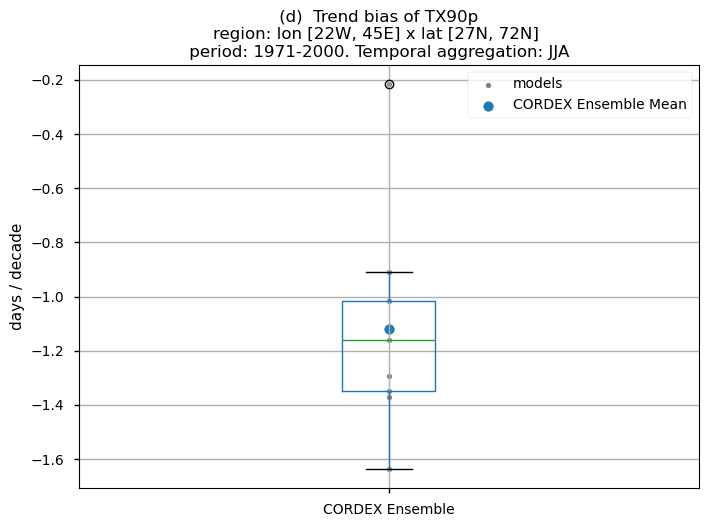

In [14]:
weights = collection_id == "CMIP6"
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model")
mean_bias_ds = diagnostics.spatial_weighted_mean(bias, weights=weights)
for is_bias, ds in zip((False, True), (mean_ds, mean_bias_ds)):
    for index, da in ds["trend"].groupby("index"):
        df_slope = da.to_dataframe()[["trend"]]
        ax = df_slope.boxplot()
        ax.scatter(
            x=[1] * len(df_slope),
            y=df_slope,
            color="grey",
            marker=".",
            label="models",
        )

        # Ensemble mean
        ax.scatter(
            x=1,
            y=da.mean("model"),
            marker="o",
            label=f"{collection_id} Ensemble Mean",
        )

        # ERA5
        labels = [f"{collection_id} Ensemble"]
        if not is_bias:
            da = ds_era5["trend"].sel(index=index)
            da = diagnostics.spatial_weighted_mean(da)
            ax.scatter(
                x=2,
                y=da.values,
                marker="o",
                label="ERA5",
            )
            labels.append("ERA5")

        ax.set_xticks(range(1, len(labels) + 1), labels)
        ax.set_ylabel(da.attrs["units"])
        plt.suptitle(f"{' (d) ' if is_bias and index==index_names[1] else '(c)' if is_bias and index==index_names[0] else ' (b) ' if not is_bias and index==index_names[1] else ' (a)'} Trend{' bias ' if is_bias else ' '}of {index} \nregion: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n period: {year_start}-{year_stop}. Temporal aggregation: {timeseries} ")
        plt.legend()
        plt.show()

**Fig 10.** Boxplots illustrating: (a) the historical trends of the ensemble distribution and ERA5 for the 'SU' index, (b) the historical trends of the ensemble distribution and ERA5 for the 'TX90p' index, (c) the trend bias of the ensemble distribution for the 'SU' index, and (d) the trend bias of the ensemble distribution for the 'TX90p' index. The distribution is created by considering spatially averaged trends across Europe. The ensemble mean and the ensemble median trends are both included. Outliers in the distribution are denoted by a grey circle with a black contour.

<br>
<br>
<br>
<br>
<div align="center">

# 2. FUTURE PERIOD NOTEBOOK

## Outline of the sub-notebook 2  

* [2.1. Abstract](#2.1.-Abstract)
* [2.2. Methods and analyses](#2.2.-Methods-and-analyses)
* [2.3. Take home messages](#2.3.-Take-home-messages)
* [2.4. Parameters, requests and functions definition](#2.4.-Parameters,-requests-and-functions-definition)
     *  [2.4.1. Import packages](#2.4.1.-Import-packages)
     *  [2.4.2. Define Parameters](#2.4.2.-Define-Parameters)
     *  [2.4.3. Define models](#2.4.3.-Define-models)
     *  [2.4.4. Define land-sea mask request](#2.4.4.-Define-land-sea-mask-request)
     *  [2.4.5. Define model requests](#2.4.5.-Define-model-requests)
     *  [2.4.6. Functions to cache](#2.4.6.-Functions-to-cache)
* [2.5. Downloading and processing](#2.5.-Downloading-and-processing)
     *  [2.5.1. Download and transform the regridding model](#2.5.1.-Download-and-transform-the-regridding-model)
     *  [2.5.2. Download and transform models](#2.5.2.-Download-and-transform-models)
     *  [2.5.3. Apply land-sea mask and change attributes](#2.5.3.-Apply-land-sea-mask-and-change-attributes)
* [2.6. Plotting section](#2.6.-Plotting-section)
     *  [2.6.1. Define plotting function](#2.6.1.-Define-plotting-function)
     *  [2.6.2. Plot ensemble maps](#2.6.2.-Plot-ensemble-maps)
     *  [2.6.3. Plot model maps](#2.6.3.-Plot-model-maps)
     *  [2.6.4. Boxplots of the future trend](#2.6.4.-Boxplots-of-the-future-trend)

## 2.1. Abstract 

In this sub-notebook, data from a subset of 9 models of  **[CORDEX](https://confluence.ecmwf.int/display/CKB/CORDEX%3A+Regional+climate+projections)** Regional Climate Models (RCM), are considered. Two maximum-temperature-based **[ECA&D](https://www.ecad.eu/indicesextremes/)** indices (one of physical nature and the other of statistical nature) are calculated using the **[icclim](https://icclim.readthedocs.io/en/stable/)** Python package. The first index, labeled with the **[ETCCDI](https://etccdi.pacificclimate.org)** short name **'SU'**, represents the count of summer days (i.e., with daily maximum temperature above 25°C) occurring in a year or a season (JJA in the example presented here). The second index, labeled with the ETCCDI short name **'TX90p'**, describes the number of days with daily maximum temperatures exceeding the daily 90th percentile of maximum temperature for a 5-day moving window. For this sub-notebook, the daily 90th percentile threshold is calculated for the historical period of 1971-2000. The index calculations, though, are performed over the future period from **2015 to 2099**, following the Representative Concentration Pathway **RCP 8.5**.

After calculating these indices for the future period (resulting in index values per year) trends are calculated. The trends are shown for each model and for the ensemble median. Additionally, maps of the ensemble spread (derived as the standard deviation of the ensemble members' distribution) are calculated and displayed for the trends. Finally, boxplots which represent statistical distributions (PDF) built on the future trend from each considered model are shown.

The size and location of the subdomain considered are customizable, as well as the temporal aggregation (annual or seasonal).

## 2.2. Methods and analyses

This sub-notebook performs the following analyses:

- Maps representing the spatial distribution of the **future trends** (2015-2099) of the indices 'SU' and 'TX90p' for each model individually, the ensemble median, and the ensemble spread.
- **Boxplots** which represent statistical distributions (PDF) built on the future trend from each considered model. 


## 2.3. Take home messages

- Trends exhibit positive values over Europe for both considered indices. For the number of summer days index (SU), the southern part of the Mediterranean Basin and the northernmost regions of Europe have trends near 0. This may be due to the fact that, for the future period, the number of summer days remains constant near 0 for the northern parts of Europe (where the threshold temperature of 25°C may be too high to be reached). Meanwhile, for the southern part of the Mediterranean Basin, this phenomenon may be attributed to the fact that the threshold is already surpassed for the entire JJA season. This emphasizes the necessity to consider both statistically and physically based extreme indices for a proper assessment.

- Regional differences can also be observed for the 'TX90p' index. Notably, values are higher for the Mediterranean Basin, consistent with the findings of Josep Cos et al. [2022](https://doi.org/10.5194/esd-13-321-2022), who assessed the Mediterranean climate change hotspot using CMIP6 projections. These regional differences appear to be greater than those observed for the CMIP6 future trend analysis of the same index.
  
- The boxplots show spatially averaged positive trends over Europe. For the 'SU' index, the ensemble median trends reach a value of 1.4 days per decade. For the 'TX90p' index, the ensemble median is nearly 5 days per decade. The interquantile range of the ensemble spans from 1.3 to 1.7 days per decade for the 'SU' index and from 4.5 to more than 5.2 days per decade for the 'TX90p' index. As for the historical analyses, the spatially-averaged trend values are lower than those obtained for the CMIP6 exercise.


## 2.4. Parameters, requests and functions definition

### 2.4.1. Import packages

In [15]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

### 2.4.2. Define Parameters

In the "Define Parameters" section, various customizable options for the sub-notebook are specified:

- The initial and ending year used for the future projections period can be specified by changing the parameters `future_slice` (2015-2099 is chosen for consistency between CORDEX and CMIP6).
- `historical_slice` determines the historical period used (1971 to 2000 to be consistent with the [sub-notebook 1](#1.-HISTORICAL-PERIOD-NOTEBOOK) is choosen)
- The `timeseries` set the temporal aggregation. For instance, selecting "JJA" implies considering only the JJA season.
- The `index_names` parameter enables the selection of maximum-temperature-based indices ('SU' and 'TX90p' in our case) from the [icclim](https://icclim.readthedocs.io/en/stable/) Python package.
- `collection_id` provides the choice between Global Climate Models CMIP6 or Regional Climate Models CORDEX.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.

In [16]:
# Time period
historical_slice = slice(1971, 2000)
future_slice = slice(2015, 2099)
assert future_slice.start > historical_slice.stop

# Choose annual or seasonal timeseries
timeseries = "JJA"
assert timeseries in ("annual", "DJF", "MAM", "JJA", "SON")

# Choose CORDEX or CMIP6
collection_id = "CORDEX"
assert collection_id in ("CORDEX", "CMIP6")

# Define region for analysis
area = [72, -22, 27, 45]

# Define region for request
cordex_domain = "europe"

# Define index names
index_names = ("SU", "TX90p")

# Interpolation method
interpolation_method = "bilinear"

# Chunks for download
chunks = {"year": 1}

### 2.4.3. Define models

The following climate analyses are performed considering a subset of RCMs from CORDEX. Models names are listed in the parameters below.

When choosing Cordex models, it is crucial to consider the availability of RCMs for the selected GCM and the specified region. The listed RCMs, for instance, are accessible for the GCM “mpi_m_mpi_esm_lr” in the “europe” cordex_domain. To confirm available combinations, refer to the Cordex webpage on Confluence.

In [17]:
models_cordex = [
    "clmcom_clm_cclm4_8_17",
    "clmcom_eth_cosmo_crclim",
    "cnrm_aladin63",
    "dmi_hirham5",
    "knmi_racmo22e",
    "mohc_hadrem3_ga7_05",
    "mpi_csc_remo2009",
    "smhi_rca4",
    "uhoh_wrf361h",
]

models_cmip6 = [
    "access_cm2",
    "awi_cm_1_1_mr",
    "cmcc_esm2",
    "cnrm_cm6_1_hr",
    "ec_earth3_cc",
    "gfdl_esm4",
    "inm_cm5_0",
    "miroc6",
    "mpi_esm1_2_lr",
]

model_regrid = "gfdl_esm4" if collection_id == "CMIP6" else "clmcom_eth_cosmo_crclim"

### 2.4.4. Define land-sea mask request

Within this sub-notebook, ERA5 will be used to download the land-sea mask when plotting. In this section, we set the required parameters for the cds-api data-request of ERA5 land-sea mask.

In [18]:
request_lsm = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": "00:00",
        "variable": "land_sea_mask",
        "year": "1940",
        "month": "01",
        "day": "01",
        "area": area,
    },
)

### 2.4.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

When `Weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes. In contrast, CORDEX RCMs, using rotated grids, inherently account for different cell surfaces based on latitude, eliminating the need for a latitude cosine multiplicative factor (`Weights = False`).

In [19]:
request_cordex = {
    "format": "zip",
    "domain": cordex_domain,
    "horizontal_resolution": "0_11_degree_x_0_11_degree",
    "temporal_resolution": "daily_mean",
    "variable": "maximum_2m_temperature_in_the_last_24_hours",
    "gcm_model": "mpi_m_mpi_esm_lr",
    "ensemble_member": "r1i1p1",
    "area": area,
}

request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "variable": "daily_maximum_near_surface_air_temperature",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}


def get_cordex_years(
    year_slice,
    timeseries,
    start_years=list(range(1951, 2097, 5)),
    end_years=list(range(1955, 2101, 5)),
):
    start_year = []
    end_year = []
    years = set(
        range(year_slice.start - int(timeseries == "DJF"), year_slice.stop + 1)
    )  # Include D(year-1)
    for start, end in zip(start_years, end_years):
        if years & set(range(start, end + 1)):
            start_year.append(start)
            end_year.append(end)
    return start_year, end_year


def get_cmip6_years(year_slice):
    return [
        str(year)
        for year in range(
            year_slice.start - int(timeseries == "DJF"),  # Include D(year-1)
            year_slice.stop + 1,
        )
    ]


if collection_id == "CORDEX":
    models = models_cordex
    model_key = "rcm_model"
    request_sim = (
        "projections-cordex-domains-single-levels",
        [
            {
                **request_cordex,
                "experiment": "historical",
                "start_year": start_year,
                "end_year": end_year,
            }
            for start_year, end_year in zip(
                *get_cordex_years(historical_slice, timeseries)
            )
        ]
        + [
            {
                **request_cordex,
                "experiment": "rcp_8_5",
                "start_year": start_year,
                "end_year": end_year,
            }
            for start_year, end_year in zip(*get_cordex_years(future_slice, timeseries))
        ],
    )
elif collection_id == "CMIP6":
    models = models_cmip6
    model_key = "model"

    requests_historical = download.split_request(
        request_cmip6
        | {"year": get_cmip6_years(historical_slice), "experiment": "historical"},
        chunks=chunks,
    )
    requests_future = download.split_request(
        request_cmip6
        | {"year": get_cmip6_years(future_slice), "experiment": "ssp5_8_5"},
        chunks=chunks,
    )
    request_sim = (
        "projections-cmip6",
        requests_historical + requests_future,
    )
else:
    raise ValueError(f"{collection_id=}")


request_grid_out = (
    request_sim[0],
    request_sim[1][0] | {model_key: model_regrid},
)

### 2.4.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter, which could be a specific season (e.g., "JJA") or "annual." It tailors the dataset according to the specified criteria, providing either annual or seasonal data as the outcome.

- The `compute_indices` function utilizes the icclim package to calculate the selected maximum-temperature-based indices.

- The `compute_trends` function employs the Mann-Kendall test for trend calculation.

- Finally, the `compute_indices_and_trends` function selects the temporal aggregation using the `select_timeseries` function. It then calculates maximum-temperature-based indices via the `compute_indices` function, determines the indices mean for the future period (2015-2099), obtain the trends using the `compute_trends` function, and offers an option for regridding to `model_regrid`.

In [20]:
def select_timeseries(ds, timeseries, year_slice):
    if timeseries == "annual":
        return ds.sel(time=slice(str(year_slice.start), str(year_slice.stop)))
    ds = ds.sel(time=slice(f"{year_slice.start-1}-12", f"{year_slice.stop}-11"))
    return ds.where(ds["time"].dt.season == timeseries, drop=True)


def compute_indices(
    ds,
    index_names,
    timeseries,
    tmpdir,
    historical_slice,
    future_slice,
):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    time_range = (f"{future_slice.start}-01-01", f"{future_slice.stop}-12-31")
    base_range = (f"{historical_slice.start}-01-01", f"{historical_slice.stop}-12-31")

    datasets = [
        icclim.index(
            index_name=index_name,
            in_files=in_files,
            out_file=f"{tmpdir}/{index_name}.nc",
            slice_mode="year" if timeseries == "annual" else timeseries,
            time_range=time_range,
            base_period_time_range=base_range if index_name == "TX90p" else None,
        )
        for index_name in index_names
    ]

    return xr.merge(datasets).drop_dims("bounds")


def compute_trends(ds):
    datasets = []
    (lat,) = set(ds.dims) & set(ds.cf.axes["Y"])
    (lon,) = set(ds.dims) & set(ds.cf.axes["X"])
    coords_name = {
        "time": "time",
        "y": lat,
        "x": lon,
    }
    for index, da in ds.data_vars.items():
        ds = Mann_Kendall_test(
            da - da.mean("time"),
            alpha=0.05,
            method="theilslopes",
            coords_name=coords_name,
        ).compute()
        ds = ds.rename({k: v for k, v in coords_name.items() if k in ds.dims})
        ds = ds.assign_coords({dim: da[dim] for dim in ds.dims})
        datasets.append(ds.expand_dims(index=[index]))
    ds = xr.concat(datasets, "index")
    return ds


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out


def compute_indices_and_trends_future(
    ds,
    index_names,
    timeseries,
    historical_slice,
    future_slice,
    resample,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds_historical = select_timeseries(ds, timeseries, historical_slice)
    ds_future = select_timeseries(ds, timeseries, future_slice)
    ds = xr.concat([ds_historical, ds_future], "time")
    if resample:
        ds = ds.resample(time="1D").max(keep_attrs=True)
    with tempfile.TemporaryDirectory() as tmpdir:
        ds_indices = compute_indices(
            ds, index_names, timeseries, tmpdir, historical_slice, future_slice
        ).compute()
        ds_trends = compute_trends(ds_indices)
        ds = ds_indices.mean("time", keep_attrs=True)
        ds = ds.merge(ds_trends)
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

## 2.5. Downloading and processing

### 2.5.1. Download and transform the regridding model

In this section, the 'download.download_and_transform' function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the selected CORDEX regridding model, select the temporal aggregation ("JJA" in our example),  compute the maximum-temperature-based indices, calculate the mean and trend over the future projections period (2015-2099), and cache the result (to avoid redundant downloads and processing). To achieve this, the function requires the following arguments:

- `transform_func_kwargs`, which includes parameters defined earlier in the sub-notebook.
- `transform_func` set to `compute_indices_and_trends`. The `compute_indices_and_trends` function was defined earlier in the "Functions to cache" section and allows the computation of indices and the calculation of their mean and trend over the future projections period (2015-2099).

In [21]:
kwargs = {
    "collection_id": request_sim[0],
    "chunks": chunks if collection_id == "CMIP6" else None,
    "transform_chunks": False,
    "transform_func": compute_indices_and_trends_future,
}
transform_func_kwargs = {
    "index_names": sorted(index_names),
    "timeseries": timeseries,
    "historical_slice": historical_slice,
    "future_slice": future_slice,
    "resample": False,
}
ds_regrid = download.download_and_transform(
    requests=[request | {model_key: model_regrid} for request in request_sim[1]],
    **kwargs,
    transform_func_kwargs=transform_func_kwargs,
)

### 2.5.2. Download and transform models

In this section, the 'download.download_and_transform' function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the CORDEX models, select the temporal aggregation ("JJA" in our example), compute the maximum-temperature-based indices, calculate the mean and trend over the future projections period (2015-2099), and cache the result (to avoid redundant downloads and processing). To achieve this, the function requires the following arguments:

- `transform_func_kwargs`, which includes parameters defined earlier in the sub-notebook.
- `transform_func` set to `compute_indices_and_trends`. The `compute_indices_and_trends` function was defined earlier in the "Functions to cache" section and allows the computation of indices and the calculation of their mean and trend over the future projections period (2015-2099).

In [22]:
interpolated_datasets = []
model_datasets = {}
for model in models:
    print(f"{model=}")
    # Original model
    ds = download.download_and_transform(
        requests=[request | {model_key: model} for request in request_sim[1]],
        **kwargs,
        transform_func_kwargs=transform_func_kwargs,
    )
    model_datasets[model] = ds

    if model != model_regrid:
        # Interpolated model
        ds = download.download_and_transform(
            requests=[request | {model_key: model} for request in request_sim[1]],
            **kwargs,
            transform_func_kwargs=transform_func_kwargs
            | {
                "request_grid_out": request_grid_out,
                "method": interpolation_method,
                "skipna": True,
            },
        )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model")

model='clmcom_clm_cclm4_8_17'
model='clmcom_eth_cosmo_crclim'
model='cnrm_aladin63'
model='dmi_hirham5'
model='knmi_racmo22e'
model='mohc_hadrem3_ga7_05'
model='mpi_csc_remo2009'
model='smhi_rca4'
model='uhoh_wrf361h'


### 2.5.3. Apply land-sea mask and change attributes

This section performs the following tasks:

1. Downloads the sea mask for ERA5.
2. Regrids ERA5's mask to the `model_regrid` grid and applies it to the regridded data
3. Regrids the ERA5 land-sea mask to the model's original grid and applies it to them.
4. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models regridded to the regridding model's grid. `model_datasets` contain the same data but in the original grid of each model.

In [23]:
# Mask
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)
ds_interpolated = ds_interpolated.where(
    diagnostics.regrid(lsm, ds_interpolated, method="bilinear")
)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_interpolated, *model_datasets.values()):
    ds["trend"] *= 10
    ds["trend"].attrs = {"long_name": "trend", "units": "days / decade"}
    for index in index_names:
        ds[index].attrs = {"long_name": "", "units": "days"}

## 2.6. Plotting section

### 2.6.1. Define plotting function

The functions presented here are used to plot the trends calculated over the future period (2015-2099) for each of the indices ('SU' and 'TX90p').

For a selected index, two layout types will be displayed, depending on the chosen function:

1. Layout including the ensemble median and the ensemble spread for the trend: `plot_ensemble()` is used.
2. Layout including every model trend: `plot_models()` is employed.

`trend==True` allows displaying trend values over the future period, while `trend==False` show mean values. In this sub-notebook, which focuses on the future period, only trend values will be shown, and, consequently, `trend==True`. When the `trend` argument is set to True, regions with no significance are hatched. For individual models, a grid point is considered to have a statistically significant trend when the p-value is lower than 0.05 (in such cases, no hatching is shown). However, for determining trend significance for the ensemble median, reliance is placed on agreement categories, following the advanced approach proposed in AR6 [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Atlas.pdf) on pages 1945-1950. The `hatch_p_value_ensemble()` function is used to distinguish between three possible cases:

1. If more than 66% of the members are statistically significant (p-value < 0.05) and more than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, and there is agreement on the sign. To represent this, no hatching is used.
2. If less than 66% of the members are statistically significant, regardless of agreement on the sign of the trend, hatching is applied (indicating that the ensemble median trend is not statistically significant).
3. If more than 66% of the members are statistically significant but less than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, but there is no agreement on the sign of the trend. This is represented using crosses.


In [24]:
#Define function to plot the cation of the figures (for the ensmble case)
def add_caption_ensemble(trend,exp):
    #Add caption to the figure
    caption_text= f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend for the {exp} period ({future_slice.start}-{future_slice.stop}). For this index, the reference daily 90th percentile threshold is calculated based on the historical period (1971-2000). The layout includes data corresponding to: (a) the ensemble median and (b) the ensemble spread (derived as the standard deviation of the ensemble members distribution)." if index=="TX90p" else f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend for the {exp} period ({future_slice.start}-{future_slice.stop}). The layout includes data corresponding to: (a) the ensemble median and (b) the ensemble spread (derived as the standard deviation of the ensemble members distribution)." 
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the cation of the figures (for the individual models case)
def add_caption_models(trend,bias,exp):
    #Add caption to the figure
    if bias:             
        caption_text = f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend bias for the {exp} period ({future_slice.start}-{future_slice.stop}) of each individual {collection_id} model." if trend else f" Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Mean bias for the {exp} period ({year_start} - {year_stop}) of each individual {collection_id} model."
    else:
        caption_text = f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend for the {exp} period ({future_slice.start}-{future_slice.stop}) of each individual {collection_id} model. For this index, the reference daily 90th percentile threshold is calculated based on the historical period (1971-2000)." if index=="TX90p" else f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggreggtion of '{timeseries}'. Trend for the {exp} period ({future_slice.start}-{future_slice.stop}) of each individual {collection_id} model."
    wrapped_lines = textwrap.wrap(caption_text, width=110)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)


def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=3,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **default_kwargs,
        )
        ax.set_title("Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **default_kwargs
    )
    ax.set_title("Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig

### 2.6.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualize the trend calculated over the future period (2015-2099) for the model ensemble across Europe.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents a single layout including trend values of the future period (2015-2099) for: (a) the ensemble median and (b) the ensemble spread (derived as the standard deviation of the ensemble members' distribution).

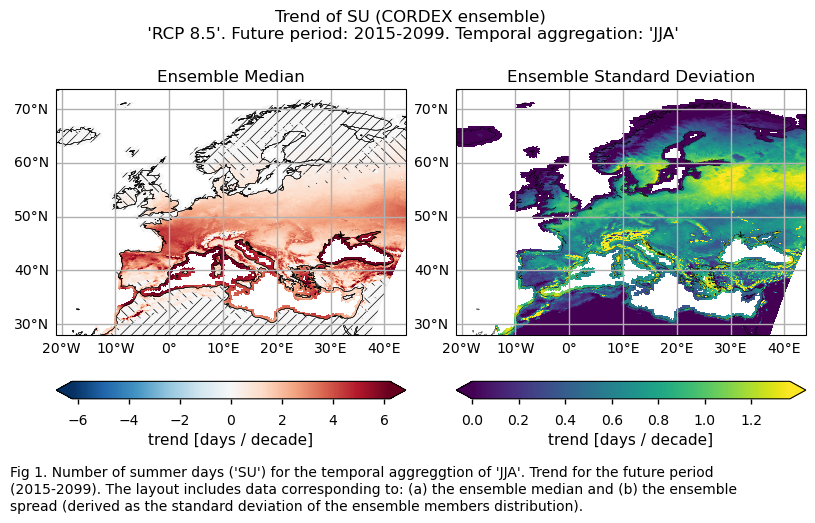

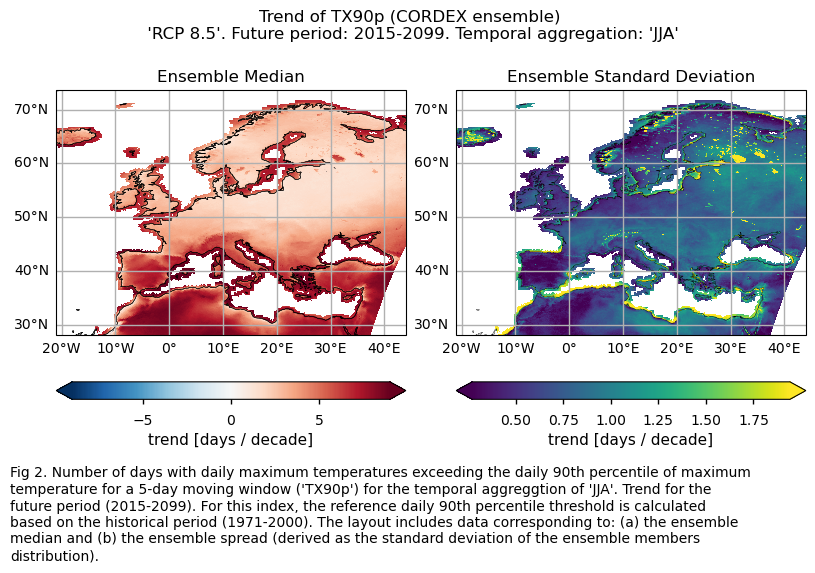

In [25]:
#Define dictionaries to use in titles and caption
long_name = {
    "SU":"Number of summer days",
    "TX90p":"Number of days with daily maximum temperatures exceeding the daily 90th percentile of maximum temperature for a 5-day moving window",
}
#Fig number counter
fig_number=1

#Common title
common_title = f"'RCP 8.5'. Future period: {future_slice.start}-{future_slice.stop}. Temporal aggregation: '{timeseries}'"


for index in index_names:
    # Trend
    fig = plot_ensemble(
        da_models=ds_interpolated["trend"].sel(index=index),
        p_value_models=ds_interpolated["p"].sel(index=index),
        center=0,
    )
    fig.suptitle(f"Trend of {index} ({collection_id} ensemble)\n {common_title}",y=0.8)
    add_caption_ensemble(trend=True,exp="future")
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

### 2.6.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualize the trend over the future period (2015-2099) for every model individually.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents a single layout including the trend for the future period (2015-2099) of every model.

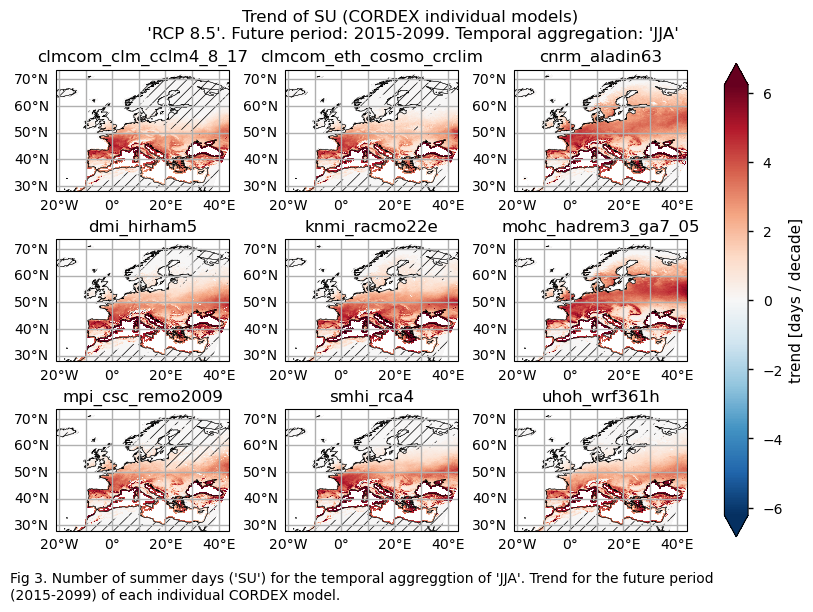

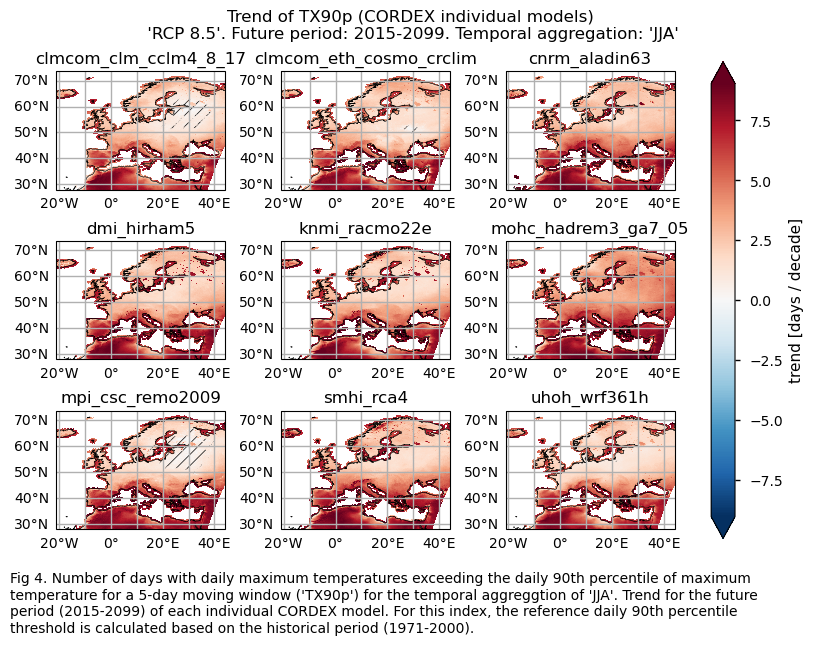

In [26]:
for index in index_names:
    # Trend
    fig = plot_models(
        data={
            model: ds["trend"].sel(index=index) for model, ds in model_datasets.items()
        },
        da_for_kwargs=ds_interpolated["trend"].sel(index=index),
        p_values={
            model: ds["p"].sel(index=index) for model, ds in model_datasets.items()
        },
        center=0,
    )
    fig.suptitle(f"Trend of {index} ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=True,bias=False,exp="future")
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

### 2.6.4. Boxplots of the future trend

Finally, we present boxplots representing the ensemble distribution of each climate model trend calculated over the future period (2015-2099) across Europe.

Dots represent the spatially-averaged future trend over the selected region (change of the number of days per decade) for each model (grey) and the ensemble mean (blue). The ensemble median is shown as a green line.

The boxplot visually illustrates the distribution of trends (or bias trends) among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

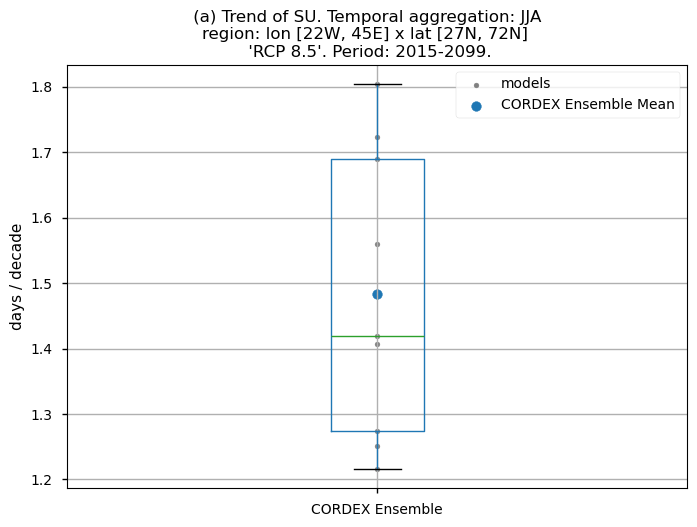

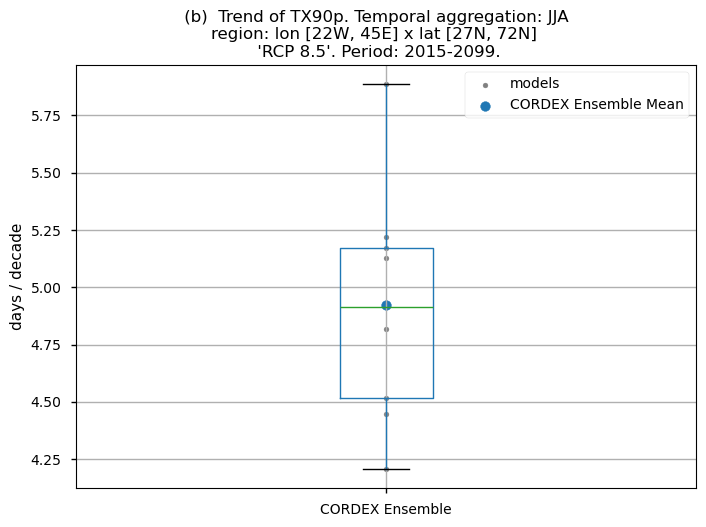

In [27]:
weights = collection_id == "CMIP6"
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model")
for index, da in mean_ds["trend"].groupby("index"):
    df_slope = da.to_dataframe()[["trend"]]
    ax = df_slope.boxplot()
    ax.scatter(
        x=[1] * len(df_slope),
        y=df_slope,
        color="grey",
        marker=".",
        label="models",
    )

    # Ensemble mean
    ax.scatter(
        x=1,
        y=da.mean("model"),
        marker="o",
        label=f"{collection_id} Ensemble Mean",
    )

    labels = [f"{collection_id} Ensemble"]
    ax.set_xticks(range(1, len(labels) + 1), labels)
    ax.set_ylabel(da.attrs["units"])
    plt.suptitle(f"{' (b) ' if index==index_names[1] else ' (a)'} Trend of {index}. Temporal aggregation: {timeseries} \nregion: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n 'RCP 8.5'. Period: {future_slice.start}-{future_slice.stop}.")
    plt.legend()
    plt.show()

**Fig 5.** Boxplots illustrating the future trends of the ensemble distribution for: (a) the 'SU' index and (b) the 'TX90p' index. The distribution is created by considering spatially averaged trends across Europe. The ensemble mean and the ensemble median trends are both included. Outliers in the distribution are denoted by a grey circle with a black contour.